In [1]:
import numpy as np
import pandas as pd

In [2]:
road_df = pd.read_csv('./data/major_road_data.csv').set_index(['OBJECTID'])

In [3]:
road_df.head(10)

,Road_ID,road_width,sidewalk_width,number_of_trees,traffic,utility,people_flow
OBJECTID,,,,,,,
33,南深路-15,0.146488,0.052719,0.000000,0.066667,0.0,0.000000
35,南深路-14,0.142051,0.052719,0.000000,0.066667,0.0,0.000000
37,南深路-13,0.134368,0.052719,0.000000,0.000000,0.0,0.000000
39,南深路-12,0.146346,0.052719,0.000000,0.000000,0.0,0.000000
42,研究院路三段-07,0.116048,0.286903,0.005682,0.000000,0.0,0.009928
44,研究院路三段-08,0.117683,0.329079,0.000000,0.266667,0.0,0.015873
47,研究院路三段-06,0.118618,0.055494,0.001894,0.000000,0.0,0.011133
48,無名(軍人公墓)-03,0.115641,0.057714,0.005682,0.133333,0.0,0.025025
50,研究院路三段-09,0.117728,0.196448,0.003788,0.000000,0.0,0.024595


In [4]:
X = road_df.iloc[:, 2:]
y = road_df.iloc[:, 1]

In [5]:
X.columns

Index(['sidewalk_width', 'number_of_trees', 'traffic', 'utility',
       'people_flow'],
      dtype='object')

In [6]:
X.describe()

,sidewalk_width,number_of_trees,traffic,utility,people_flow
count,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000
mean,0.144775,0.024543,0.044818,0.005008,0.127285
std,0.082665,0.048049,0.068946,0.040357,0.131504
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087773,0.000000,0.000000,0.000000,0.035300
50%,0.126526,0.003788,0.000000,0.000000,0.090248
75%,0.182852,0.032197,0.066667,0.000000,0.173565
max,0.930633,0.649621,1.000000,0.750000,1.000000


In [7]:
y.agg(['min', 'median', 'mean', 'max', 'std', 'var'])

min       0.038336
median    0.146708
mean      0.194957
max       1.000000
std       0.120283
var       0.014468
Name: road_width, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
SSE = []
score = []
for i in range(2, 9):
    estimator = KMeans(n_clusters=i, random_state=31).fit(X)
    SSE.append(estimator.inertia_)
    score.append(silhouette_score(X, estimator.labels_))

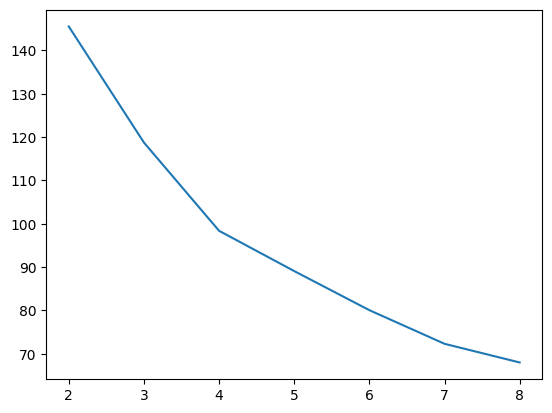

In [11]:
plt.plot(range(2, 9), SSE)

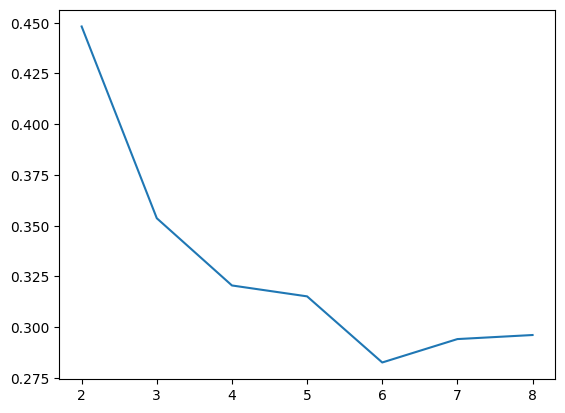

In [12]:
plt.plot(range(2, 9), score)

In [13]:
estimator = KMeans(n_clusters=3, random_state=31).fit(X)
estimator.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [14]:
road_df['cluster_id'] = estimator.labels_

In [15]:
import plotly.graph_objects as go

In [16]:
fig = go.Figure()

for i in range(estimator.n_clusters):
    fig.add_trace(go.Scatterpolar(
        r = estimator.cluster_centers_[i],
        theta = X.columns,
        fill = 'toself',
        name = i
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
)

fig.show()